In [5]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
data = pd.read_csv('titanic.csv')

In [ ]:
# Preprocess the data
# ... (Code for data preprocessing, handling missing values, categorical encoding, etc.)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Examine the structure of the dataset
print("Dataset structure:")
print(data.info())

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Analyze the distribution of the target variable
print("\nSurvived distribution:")
print(data['Survived'].value_counts())


Survived distribution:
0    549
1    342
Name: Survived, dtype: int64


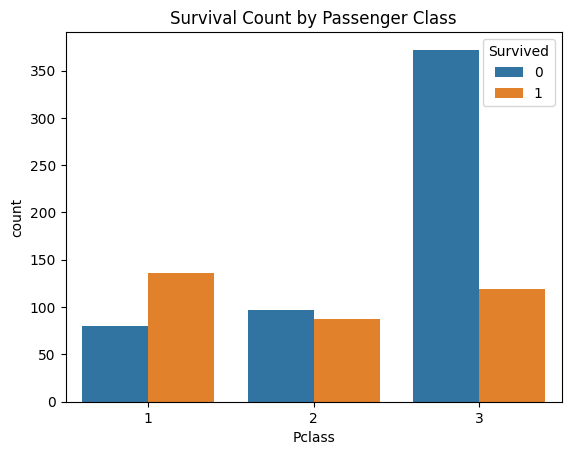

In [ ]:
# Explore relationships between features and survival
# Example: Relationship between passenger class and survival
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Passenger Class')
plt.show()

In [ ]:
# Address missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Handle missing values (example: filling missing age values with the mean)
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Address outliers (example: remove outliers in fare column using Z-score)
z_score = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()
data = data.loc[z_score.abs() < 3]

# Handle categorical variables (example: one-hot encoding for 'Sex' column)
data_encoded = pd.get_dummies(data, columns=['Sex'])

# Perform feature scaling (example: standardization of 'Age' and 'Fare' columns)
data_encoded['Age'] = (data_encoded['Age'] - data_encoded['Age'].mean()) / data_encoded['Age'].std()
data_encoded['Fare'] = (data_encoded['Fare'] - data_encoded['Fare'].mean()) / data_encoded['Fare'].std()

# Final preprocessed dataset
print("\nPreprocessed dataset:")
print(data_encoded.head())


Preprocessed dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.588813      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.639674      1      0   
2                             Heikkinen, Miss. Laina -0.281691      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.409333      1      0   
4                           Allen, Mr. William Henry  0.409333      0      0   

             Ticket      Fare Cabin Embarked  Sex_female  Sex_male  
0         A/5 21171 -0.656879   NaN        S           0         1  
1          PC 17599  1.524747   C85        C           1         0  
2  STON/O2. 3101282 -0.633881   NaN        S           1         0  
3  

In [9]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
# Preprocess the data (example: one-hot encoding for categorical variables)
data = pd.get_dummies(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.2, random_state=42)

# Initialize and train different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    print(f"Model: {model_name}")
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")


Model: Logistic Regression
Accuracy: 0.76
Precision: 0.7183098591549296
Recall: 0.6986301369863014
F1-Score: 0.7083333333333335
Model: Decision Tree


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8114285714285714
Precision: 0.803030303030303
Recall: 0.726027397260274
F1-Score: 0.7625899280575539
Model: Random Forest
Accuracy: 0.7942857142857143
Precision: 0.8627450980392157
Recall: 0.6027397260273972
F1-Score: 0.7096774193548387
Model: Support Vector Machine
Accuracy: 0.6114285714285714
Precision: 0.8571428571428571
Recall: 0.0821917808219178
F1-Score: 0.15


In [12]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.2, random_state=42)

# Initialize and train the models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Evaluate the models
logistic_regression_score = logistic_regression.score(X_test, y_test)
decision_tree_score = decision_tree.score(X_test, y_test)
random_forest_score = random_forest.score(X_test, y_test)

print(f"Logistic Regression Score: {logistic_regression_score}")
print(f"Decision Tree Score: {decision_tree_score}")
print(f"Random Forest Score: {random_forest_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Score: 0.76
Decision Tree Score: 0.8
Random Forest Score: 0.7942857142857143


In [13]:
# Hyperparameter tuning using Grid Search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

decision_tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
decision_tree_grid.fit(X_train, y_train)

best_params_grid = decision_tree_grid.best_params_
best_score_grid = decision_tree_grid.best_score_

print("Grid Search - Decision Tree")
print(f"Best Parameters: {best_params_grid}")
print(f"Best Score: {best_score_grid}")


# Hyperparameter tuning using Random Search
param_dist = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

decision_tree_random = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, cv=5, n_iter=10, random_state=42)
decision_tree_random.fit(X_train, y_train)

best_params_random = decision_tree_random.best_params_
best_score_random = decision_tree_random.best_score_

print("Random Search - Decision Tree")
print(f"Best Parameters: {best_params_random}")
print(f"Best Score: {best_score_random}")

Grid Search - Decision Tree
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.8247584789311407
Random Search - Decision Tree
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'criterion': 'gini'}
Best Score: 0.8232990750256939


In [14]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.2, random_state=42)

# Train a Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Save the trained model
joblib.dump(random_forest, 'random_forest_model.pkl')

# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

# Make predictions using the loaded model
predictions = loaded_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Analyze feature importance
feature_importance = loaded_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Accuracy: 0.8
Feature Importance:
                               Feature  Importance
877                         Sex_female    0.101830
878                           Sex_male    0.083914
5                                 Fare    0.057911
2                                  Age    0.046715
0                          PassengerId    0.044144
...                                ...         ...
1319                     Ticket_367229    0.000000
161   Name_Chronopoulos, Mr. Apostolos    0.000000
767           Name_Stankovic, Mr. Ivan    0.000000
164   Name_Clifford, Mr. George Quincy    0.000000
238    Name_Elsbury, Mr. William James    0.000000

[1692 rows x 2 columns]
